In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
print('tensorflow', tf.__version__)

tensorflow 2.13.0


In [ ]:
model_VGG16 = tf.keras.applications.VGG16(include_top=True, weights='imagenet')
model_VGG16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model_VGG16_notop = tf.keras.applications.VGG16(include_top=False, weights='imagenet', input_shape = (32,32,3))
model_VGG16_notop.summary()
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

(224, 224, 3)
R channel AVG: 96.29793128188776
G channel AVG: 90.23985570790816
B channel AVG: 54.940788424744895


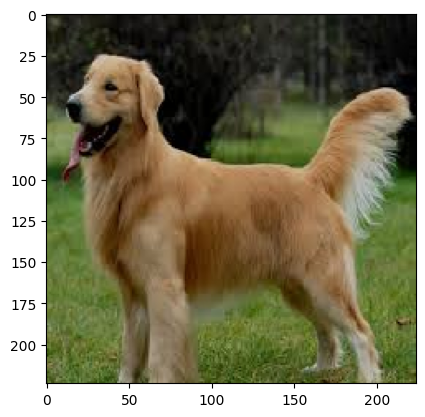

In [ ]:
img = tf.keras.preprocessing.image.load_img('/content/gold_dog.jpg',target_size=(224,224))
# img = tf.keras.preprocessing.image.load_img('/content/gold_dog.jpg',target_size=(32,32))
img = np.array(img)
plt.imshow(img)
print(img.shape)
print('R channel AVG:', np.mean(img[:,:,0]))
print('G channel AVG:', np.mean(img[:,:,1]))
print('B channel AVG:', np.mean(img[:,:,2]))

In [ ]:
x = np.expand_dims(img, axis=0)
x = tf.keras.applications.vgg16.preprocess_input(x)
print(x.shape)
print('R channel AVG:', np.mean(x[0,:,:,0]))
print('G channel AVG:', np.mean(x[0,:,:,1]))
print('B channel AVG:', np.mean(x[0,:,:,2]))

(1, 224, 224, 3)
R channel AVG: -48.998215
G channel AVG: -26.539143
B channel AVG: -27.382067


In [ ]:
y_pred = model_VGG16.predict(x)
top_prediction = tf.keras.applications.vgg16.decode_predictions(y_pred, top=5)[0]
top_prediction

35363/35363 [==============================] - 0s 0us/step


[('n02099601', 'golden_retriever', 0.9001082),
 ('n02099712', 'Labrador_retriever', 0.021917846),
 ('n02104029', 'kuvasz', 0.018392105),
 ('n02091831', 'Saluki', 0.010036397),
 ('n02111129', 'Leonberg', 0.007826946)]

top-1 is golden_retriever. (0.90)
top-2 is Labrador_retriever. (0.02)
top-3 is kuvasz. (0.02)
top-4 is Saluki. (0.01)
top-5 is Leonberg. (0.01)


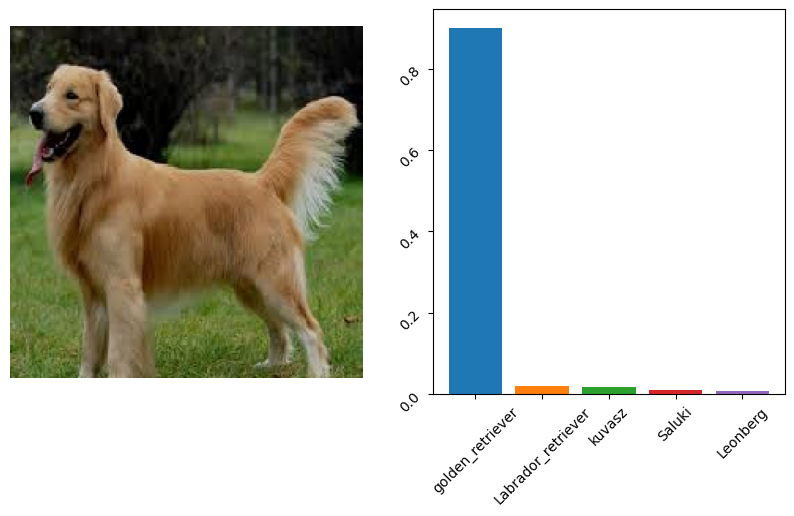

In [ ]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 5), dpi=100)
ax1.imshow(img)
ax1.set_axis_off()
for k, (class_name, class_description, score) in enumerate(top_prediction):
  print(f'top-{k + 1} is {class_description}. ({score:.2f})')
  ax2.bar(class_description, score)
  ax2.tick_params (labelrotation=45)

In [ ]:
datagen = ImageDataGenerator(
  # rescale=1./255,
  rotation_range=30,    # 隨機旋轉的度數範圍。
  width_shift_range=0.1,  # 水平位置平移 距離上限為 寬度乘以參數
  height_shift_range=0.1, # 垂直位置平移 距離上限為 寬度乘以參數
  shear_range=0.2,     #剪切强度
  zoom_range=0.2,     # 圖片縮放<1 為放大 >1 為縮小
  # channel_shift_range=0.0, # 通道數量偏移 用來改變圖片顔色
  horizontal_flip=True,  #隨機水平翻轉
  fill_mode='nearest',
  validation_split=0.2
  # 所有參數説明 https://keras.io/zh/preprocessing/image/
)


In [ ]:
img = tf.keras.preprocessing.image.load_img('/content/gold_dog.jpg',target_size=(224,224))
m = tf.keras.preprocessing.image.img_to_array(img)
print(m.shape)
n = []
n.append(m)
n = np.array(n)
print(n.shape)

(224, 224, 3)
(1, 224, 224, 3)


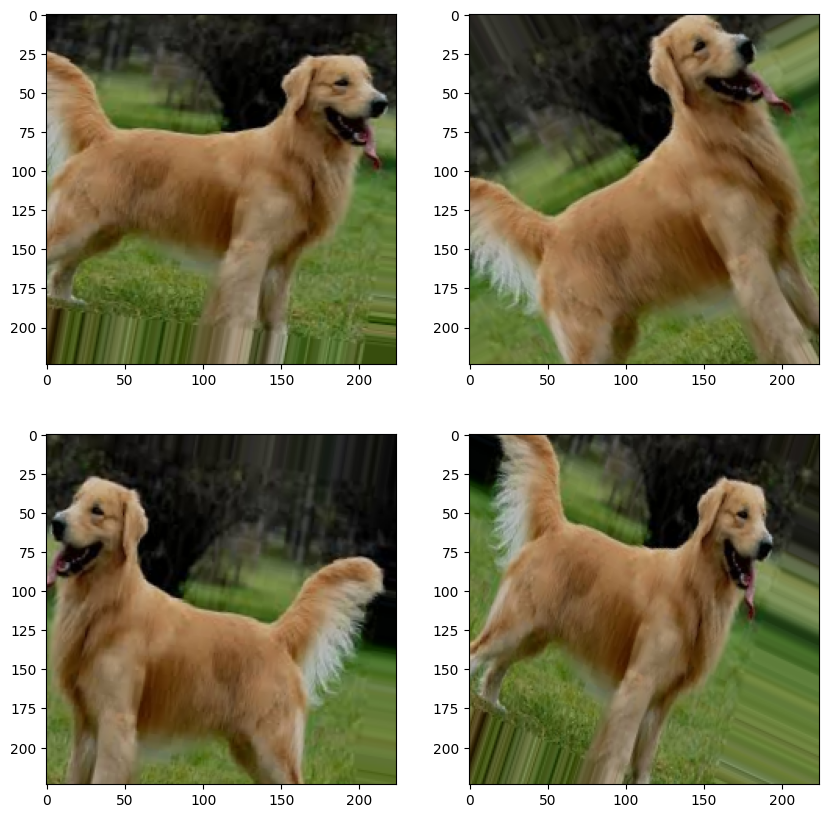

In [ ]:
# 產生資料增強圖片
augmented_images = datagen.flow(n, batch_size=1)

# 隨機取得4 張資料增強圖片並顯示
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), dpi=100)
axes = axes.flatten()

for i in range(4):
  # 取得下一張資料增強圖片
  augmented_image = augmented_images.next()[0]
  augmented_image = augmented_image.astype('uint8')
  axes[i].imshow(augmented_image)

plt.show()

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
# 資料拆分
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [ ]:
# one-hot encodering
y_train = to_categorical(y_train, num_classes = 10)
y_val = to_categorical(y_val, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [ ]:
# 資料前處理
x_train = x_train * 1.0/255
x_val = x_val * 1.0/255
x_test = x_test * 1.0/255

In [ ]:
print(x_train.shape, x_val.shape, x_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(40000, 32, 32, 3) (10000, 32, 32, 3) (10000, 32, 32, 3)
(40000, 10) (10000, 10) (10000, 10)


In [ ]:
train_datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
train_datagen.fit(x_train)

In [ ]:
checkpoint_filepath = './check.h5'

callback_checkpoint = tf.keras.callbacks.ModelCheckpoint(
  filepath=checkpoint_filepath,
  save_weights_only=True,
  monitor='val_accuracy',
  mode='max',
  save_best_only=True
)

reduce_learning_rate= tf.keras.callbacks.ReduceLROnPlateau(
  monitor='val_accuracy',
  mode='max',
  factor=0.8,
  patience=3,
  cooldown=0,
  min_lr=0.000001,
  verbose=1
)

callback_Earlystop = tf.keras.callbacks.EarlyStopping (monitor= 'val_accuracy',mode='max', patience=3)

In [ ]:
model_VGG16_notop = tf.keras.applications.VGG16(include_top=False, weights='imagenet', input_shape=(32,32,3))

model_VGG16_notop.trainable = False # True表示參與訓練， False表示凍結權重

x = model_VGG16_notop.output
x = Flatten()(x)
x = tf.keras.layers.Dense(4096, activation='relu')(x)
x = tf.keras.layers.Dense(4096, activation='relu')(x)
predictions = tf.keras.layers.Dense(10,activation='softmax')(x)

model = Model(model_VGG16_notop.input, predictions)

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(
    train_datagen.flow(x_train, y_train, batch_size=128),
    validation_data = (x_val, y_val),
    epochs = 3,
    verbose = 1,
    callbacks = [callback_checkpoint, reduce_learning_rate, callback_Earlystop]
)


loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (accuracy*100, loss))

Epoch 1/3
313/313 [==============================] - 904s 3s/step - loss: 1.4702 - accuracy: 0.4869 - val_loss: 1.2098 - val_accuracy: 0.5748 - lr: 0.0010
Epoch 2/3
313/313 [==============================] - 901s 3s/step - loss: 1.2459 - accuracy: 0.5616 - val_loss: 1.1800 - val_accuracy: 0.5882 - lr: 0.0010
Epoch 3/3
313/313 [==============================] - 901s 3s/step - loss: 1.1870 - accuracy: 0.5807 - val_loss: 1.1414 - val_accuracy: 0.6035 - lr: 0.0010
Testing Accuracy = 59.52 %    loss = 1.156711


# 新增區段